In [1]:
import os
import time

# Self-code imports
import polytopes.segmentation_algorithms as algos
from polytopes.model.note import Note
from polytopes.model.chord import Chord
import polytopes.polytopical_costs as pc
import polytopes.data_manipulation as dm
import polytopes.pattern_manip as pm
import polytopes.pattern_factory as pf


#Generic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy


In [2]:
# Subset 
#database_path = "C:\\Users\\amarmore\\Desktop\\Projects\\RWC_annotations\\subset_analysis\\"

# Database
database_path = "C:\\Users\\amarmore\\Desktop\\Projects\\RWC_annotations\\final_bimbot_al\\"

max_size = 10

manual = []

for file in os.listdir(database_path):
    bag_of_words = file.split(".")
    if bag_of_words[-1] == "seq":
        if bag_of_words[-3] == "manual":
            manual.append(file)

# My Code

## Direct antecedents

Prec: 0.2166, rap: 0.789, F measure: 0.3394


[]

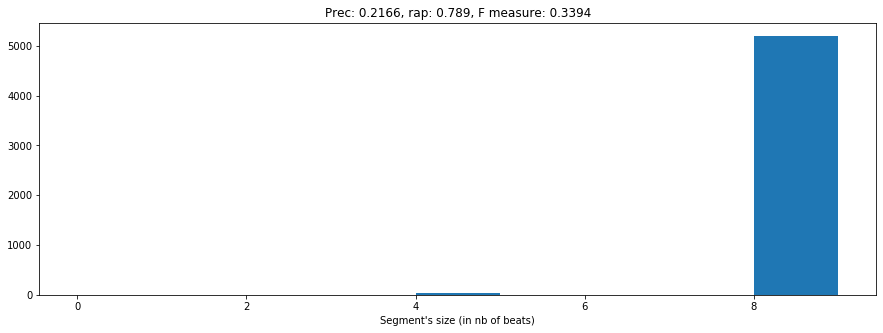

In [3]:
annotations_folder_path = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\annotations\\final_bimbot\\"
persisted_path = "C:\\Users\\amarmore\\Desktop\\data_persisted"
flow_folder = "C:\\Users\\amarmore\\Desktop\\Annotations MIREX Quaero\\annotations_as_flow\\"

all_res = []
all_res_one = []
distrib_segments = []

for song in manual:
    song_number = song.split(".")[0]

    with open("{}\\{}.flow_simple".format(flow_folder, song_number),'r') as obj:
        bag_of_chords = obj.read().split("\n")
        while '' in bag_of_chords:
            bag_of_chords.remove('')
    """bag_of_chords = dm.flowify_song(database_path + song)
    for couple in zip(bag_of_chords, a):
        if couple[0].triad != couple[1]:
            print(couple)"""

    frontiers, _ = algos.dynamic_minimization_guichaoua(bag_of_chords, 
                                                        positive_segment_size_penalty = 0, negative_segment_size_penalty = 0.125, 
                                                        min_size = 8, max_size = max_size, target_size = 32, 
                                                        positive_penalty = 2.25, negative_penalty = 3,
                                                        global_antecedents = False)

    for fst, snd in zip(frontiers[:-1], frontiers[1:]):
        distrib_segments.append(snd - fst)

    """
    # Scores, computed on time
    song_number = song.split(".")[0]
    this_song_ann = dm.get_annotation_name_from_song(song_number, "MIREX10")
    annotation_path = "{}\\{}".format(annotations_folder_path, this_song_ann)
    annotations = dm.get_segmentation_from_txt(annotation_path, "MIREX10")
    references_segments = np.array(annotations)[:, 0:2]
    beats = np.load("{}\\beats\\{}.npy".format(persisted_path, int(song_number)), allow_pickle=True)                

    estimation = []
    for f in frontiers:
        if f < len(beats):
            estimation.append(beats[f])
        else:
            estimation.append(beats[-1])
    estimated_seg = dm.frontiers_to_segments(estimation)

    prec, rec, fmes = dm.compute_score_of_segmentation(references_segments, estimated_seg, window_length = 0.5)"""

    #Scores, computed on the beat annotation
    beat_indexed_segments = dm.frontiers_to_segments(frontiers)

    song_number = song.split(".")[0]
    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    p, r, f = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, window_length = 0.5)
    all_res.append([p, r, f])

results = np.array(all_res)
prec, rap, fmes = round(np.mean(results[:,0]),4), round(np.mean(results[:,1]),4), round(np.mean(results[:,2]),4)
print("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.figure(figsize=(15,5))
plt.hist(distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()

## Global antecedents

Prec: 0.2166, rap: 0.789, F measure: 0.3394


[]

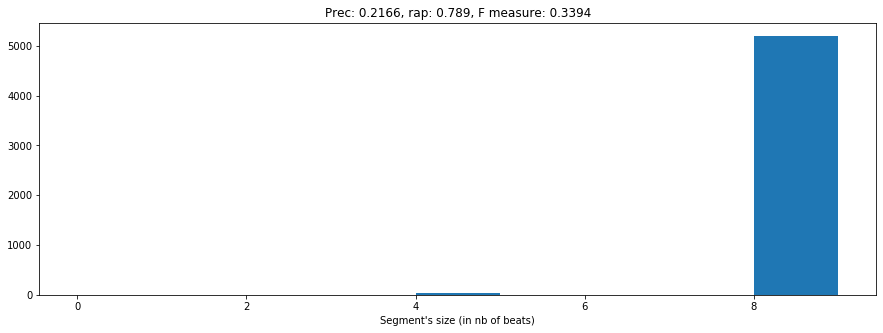

In [4]:
annotations_folder_path = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\annotations\\final_bimbot\\"
persisted_path = "C:\\Users\\amarmore\\Desktop\\data_persisted"
flow_folder = "C:\\Users\\amarmore\\Desktop\\Annotations MIREX Quaero\\annotations_as_flow\\"

all_res = []
all_res_one = []
distrib_segments = []

for song in manual:
    song_number = song.split(".")[0]

    with open("{}\\{}.flow_simple".format(flow_folder, song_number),'r') as obj:
        bag_of_chords = obj.read().split("\n")
        while '' in bag_of_chords:
            bag_of_chords.remove('')
    """bag_of_chords = dm.flowify_song(database_path + song)
    for couple in zip(bag_of_chords, a):
        if couple[0].triad != couple[1]:
            print(couple)"""

    frontiers, _ = algos.dynamic_minimization_guichaoua(bag_of_chords, 
                                                        positive_segment_size_penalty = 0, negative_segment_size_penalty = 0.125, 
                                                        min_size = 8, max_size = max_size, target_size = 32, 
                                                        positive_penalty = 2.25, negative_penalty = 3,
                                                        global_antecedents = True)

    for fst, snd in zip(frontiers[:-1], frontiers[1:]):
        distrib_segments.append(snd - fst)

    """
    # Scores, computed on time
    song_number = song.split(".")[0]
    this_song_ann = dm.get_annotation_name_from_song(song_number, "MIREX10")
    annotation_path = "{}\\{}".format(annotations_folder_path, this_song_ann)
    annotations = dm.get_segmentation_from_txt(annotation_path, "MIREX10")
    references_segments = np.array(annotations)[:, 0:2]
    beats = np.load("{}\\beats\\{}.npy".format(persisted_path, int(song_number)), allow_pickle=True)                

    estimation = []
    for f in frontiers:
        if f < len(beats):
            estimation.append(beats[f])
        else:
            estimation.append(beats[-1])
    estimated_seg = dm.frontiers_to_segments(estimation)

    prec, rec, fmes = dm.compute_score_of_segmentation(references_segments, estimated_seg, window_length = 0.5)"""

    #Scores, computed on the beat annotation
    beat_indexed_segments = dm.frontiers_to_segments(frontiers)

    song_number = song.split(".")[0]
    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    p, r, f = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, window_length = 0.5)
    all_res.append([p, r, f])

results = np.array(all_res)
prec, rap, fmes = round(np.mean(results[:,0]),4), round(np.mean(results[:,1]),4), round(np.mean(results[:,2]),4)
print("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.figure(figsize=(15,5))
plt.hist(distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()

# Auto DB

In [7]:
# Subset 
#database_path = "C:\\Users\\amarmore\\Desktop\\Projects\\RWC_annotations\\subset_analysis\\"

# Database
database_path = "C:\\Users\\amarmore\\Desktop\\Projects\\RWC_annotations\\final_bimbot_al\\"

max_size = 10

auto = []

for file in os.listdir(database_path):
    bag_of_words = file.split(".")
    if bag_of_words[-1] == "seq":
        if bag_of_words[-3] == "auto":
            auto.append(file)

In [8]:
annotations_folder_path = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\annotations\\final_bimbot\\"
persisted_path = "C:\\Users\\amarmore\\Desktop\\data_persisted"
auto_res = []
auto_distrib_segments = []

for song in auto:
    print(song)
    auto_bag_of_chords = dm.flowify_song(database_path + song)

    auto_frontiers, _ = algos.dynamic_minimization_guichaoua(auto_bag_of_chords, 
                                                             positive_segment_size_penalty = 0, negative_segment_size_penalty = 0.125, 
                                                             min_size = 8, max_size = max_size, target_size = 32, 
                                                             positive_penalty = 2.25, negative_penalty = 3)

    for fst, snd in zip(auto_frontiers[:-1], auto_frontiers[1:]):
        auto_distrib_segments.append(snd - fst)

    """
    # Scores, computed on time
    song_number = song.split(".")[0]
    this_song_ann = dm.get_annotation_name_from_song(song_number, "MIREX10")
    annotation_path = "{}\\{}".format(annotations_folder_path, this_song_ann)
    annotations = dm.get_segmentation_from_txt(annotation_path, "MIREX10")
    references_segments = np.array(annotations)[:, 0:2]
    beats = np.load("{}\\beats\\{}.npy".format(persisted_path, int(song_number)), allow_pickle=True)                

    estimation = []
    for f in frontiers:
        if f < len(beats):
            estimation.append(beats[f])
        else:
            estimation.append(beats[-1])
    estimated_seg = dm.frontiers_to_segments(estimation)

    prec, rec, fmes = dm.compute_score_of_segmentation(references_segments, estimated_seg, window_length = 0.5)"""

    #Scores, computed on the beat annotation
    auto_beat_indexed_segments = dm.frontiers_to_segments(auto_frontiers)

    song_number = song.split(".")[0]
    annot_name = "{:03d}.auto.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation if x !=''])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    p, r, f = dm.compute_score_of_segmentation(beat_indexed_annotation, auto_beat_indexed_segments, window_length = 0.5)
    auto_res.append([p, r, f])

results = np.array(auto_res)
prec, rap, fmes = round(np.mean(results[:,0]),4), round(np.mean(results[:,1]),4), round(np.mean(results[:,2]),4)
print("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.figure(figsize=(15,5))
plt.hist(auto_distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()

001.auto.simple.seq
002.auto.simple.seq
003.auto.simple.seq
004.auto.simple.seq
005.auto.simple.seq
006.auto.simple.seq
007.auto.simple.seq
008.auto.simple.seq
009.auto.simple.seq


InvalidChordNotesException: Empty list of notes: a Chord must admit notes.

# His outputs

In [ ]:
annotations_folder_path = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\annotations\\final_bimbot\\"
flow_file_path = "C:\\Users\\amarmore\\Desktop\\Annotations MIREX Quaero\\annotations_as_flow\\"
all_res = []
g_distrib_segments = []
for song in manual:
    bag_of_chords = dm.flowify_song(database_path + song)
    song_number = song.split(".")[0]
    guichaoua_estimates = open(flow_file_path + "Guichaoua Estimates\\Experiments\\{:03d}_0penalties.frontiers_estimated".format(int(song_number)), "r")
    tab = guichaoua_estimates.read().split(" ")
    guichaoua_frontiers = [int(i) - 1 for i in tab if i != "\n"]
    if guichaoua_frontiers[-1] < len(bag_of_chords)-1:
        guichaoua_frontiers.append(len(bag_of_chords)-1)
        
    for fst, snd in zip(guichaoua_frontiers[:-1], guichaoua_frontiers[1:]):
        g_distrib_segments.append(snd - fst)

    beat_indexed_segments = dm.frontiers_to_segments(guichaoua_frontiers)

    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    p, r, f = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, window_length = 0.2)
    all_res.append([p, r, f])

results = np.array(all_res)
prec, rap, fmes = round(np.mean(results[:,0]),4), round(np.mean(results[:,1]),4), round(np.mean(results[:,2]),4)
print("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))

plt.figure(figsize=(15,5))
plt.hist(g_distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
#plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()